### Diabetes Prediction Project

In [1]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes_data_upload.csv")

In [3]:
df.head(n=3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive


In [4]:
df.shape

(520, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
df.groupby(["Gender"])[['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']].count()

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Gender,,,,,,,,,,,,,,,
Female,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
Male,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328


In [8]:
df["class"].value_counts()

class
Positive    320
Negative    200
Name: count, dtype: int64

In [9]:
df1 = df.copy()

In [10]:
#Apply label encoding in readiness for data analysis
df1 = pd.get_dummies(df1, drop_first = True)

In [11]:
df1.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,58,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,41,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,45,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,60,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


In [12]:
#Put 75% of the data into a training set and the remaining 25% into a testing set.
y = df1["class_Positive"]
X = df1.copy()
X = X.drop("class_Positive", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)


In [13]:
#Fit a decision tree classifier model to the data
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)


In [14]:
#Print out the decision tree model’s accuracy, precision, recall, and F1 score
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.976923
Precision: 0.986301
Recall: 0.972973
F1 Score: 0.979592


#### Model Performance Metrics

Accuracy: 0.976923

Explanation: Accuracy measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.

Interpretation: An accuracy of 97.7% means that the model correctly identifies 97.7% of the patients, whether diabetic or non-diabetic. This high accuracy indicates that the model is highly reliable in making correct predictions.

Precision: 0.986301

Explanation: Precision is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives).

Interpretation: A precision of approximately 98.6% indicates that when the model predicts a patient as diabetic, 98.6% of the time, this prediction is correct. This high precision value suggests that the model has a low rate of false positives, meaning it rarely predicts non-diabetic patients as diabetic.

Recall: 0.972973

Explanation: Recall (also known as sensitivity or true positive rate) is the ratio of true positive predictions to the total number of actual positives (true positives and false negatives).

Interpretation: A recall of approximately 97.3% means that the model correctly identifies 97.3% of all actual diabetic cases. This high recall value indicates that the model is effective at detecting diabetic patients and has a low rate of false negatives, meaning it rarely misses actual diabetic cases.

F1 Score: 0.979592

Explanation: The F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. It ranges from 0 to 1, with higher values indicating better performance.

Interpretation: An F1 Score of approximately 97.9% suggests that the model maintains a good balance between precision and recall. This means that the model is both accurate in identifying diabetic patients and minimizes the number of missed diagnoses, providing a robust overall performance.

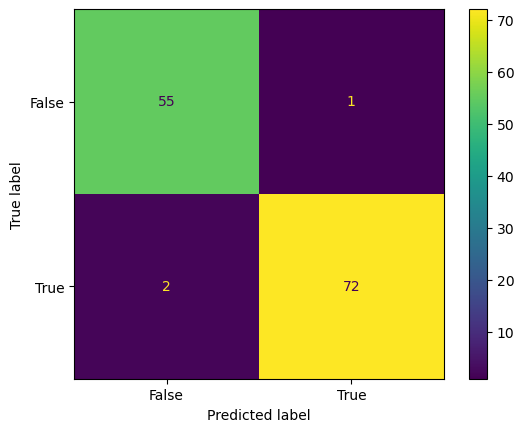

In [15]:
#Plotting the confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =decision_tree.classes_)
disp.plot()

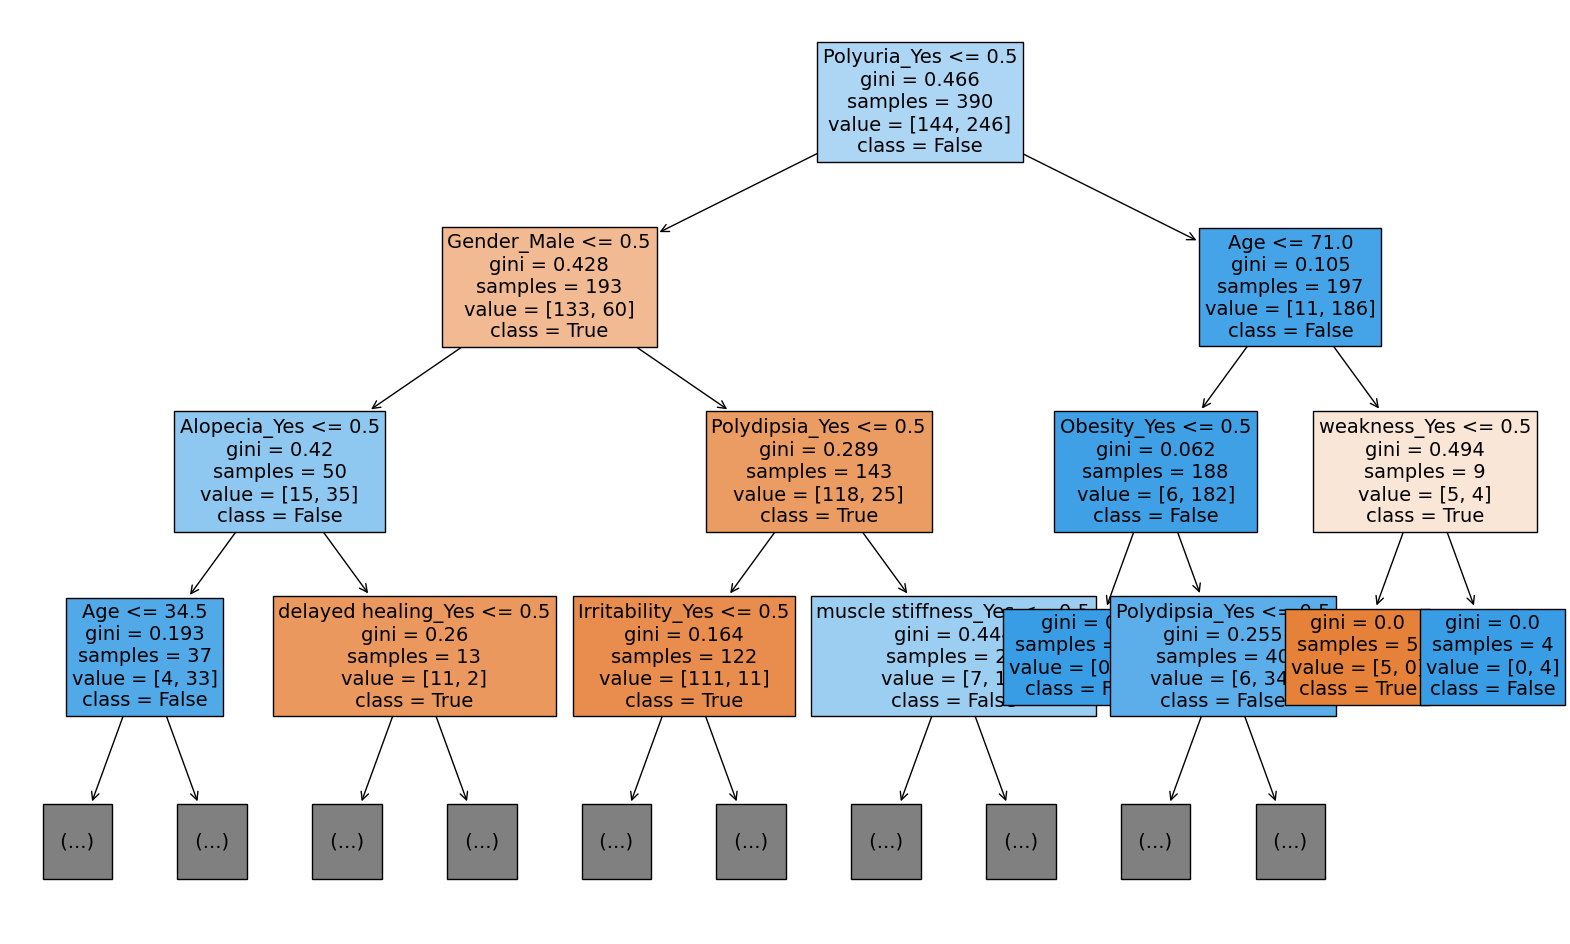

In [16]:
#Use the plot_tree function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.
plt.figure(figsize=(20, 12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns, class_names=["True", "False"], filled=True)
plt.show()

### Explanation

Polyuria and Polydipsia are strong indicators of diabetes, as evidenced by their placement near the root of the tree.

Gender plays a significant role in predicting diabetes for patients without Polyuria.

The presence of Alopecia and Obesity are strong indicators for females and younger patients with Polyuria, respectively.

Age is a crucial factor, particularly for patients with Polyuria, where younger age groups are more likely to be diabetic.

Additional symptoms like Irritability, Delayed Healing, and Weakness provide further granularity in prediction.

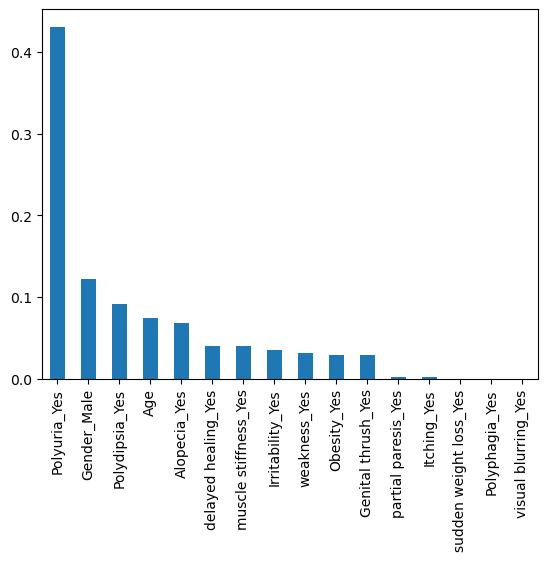

In [17]:
#Plotting the Feature Importance
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

#### Explanation of the Graph

The x-axis lists the features, and the y-axis represents the importance score of each feature, which is a value between 0 and 1. These scores are normalized such that the sum of all feature importance values equals 1.

#### Key Observations

Polyuria_Yes: Importance: ~0.45

Explanation: This feature has the highest importance score, indicating that whether a patient experiences Polyuria (excessive urination) is the most significant predictor of diabetes in this dataset. The decision tree model relies heavily on this feature to split the data effectively.

Gender_Male: Importance: ~0.12

Explanation: The second most important feature is the gender of the patient, with a particular emphasis on whether the patient is male. This suggests that gender differences play a crucial role in the likelihood of diabetes.

Polydipsia_Yes: Importance: ~0.1

Explanation: Similar to Polyuria, Polydipsia (excessive thirst) is another major symptom that the model considers highly significant in predicting diabetes.

Age: Importance: ~0.07

Explanation: The age of the patient is also a critical feature. It helps to differentiate between diabetic and non-diabetic patients, likely due to the higher prevalence of diabetes in certain age groups, ETC — OTHERS.